# DSE 3260
## Week - 10
### Reg. No - 200968216
### Pratinav Seth

TEMPORAL DIFFERENCE-SARSA, Q-LEARNING

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt


Use the Taxi v2 environment:https://www.gymlibrary.dev/environments/toy_text/taxi/Learn the policy using the following algorithms (Let parameters α= 0.4, γ= 0.9, Ɛ= 0.9):
 - 1.SARSA
 - 2.Q-Learning
 - 3.Expected SARSA

In [5]:
env = gym.make('Taxi-v3')
alpha = 0.4
gamma = 0.9
epsilon = 0.9
n_episodes = 2000 

In [6]:
q_table = np.zeros((env.observation_space.n, env.action_space.n))

In [7]:
def choose_action(state):
    if np.random.uniform() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state])
    return action

def update_sarsa(state, action, reward, next_state, next_action):
    td_error = reward + gamma * q_table[next_state][next_action] - q_table[state][action]
    q_table[state][action] += alpha * td_error

def update_q_learning(state, action, reward, next_state):
    td_error = reward + gamma * np.max(q_table[next_state]) - q_table[state][action]
    q_table[state][action] += alpha * td_error

def update_expected_sarsa(state, action, reward, next_state):
    next_action_probs = np.ones(env.action_space.n) * epsilon / env.action_space.n
    next_action_probs[np.argmax(q_table[next_state])] += 1 - epsilon
    expected_q_value = np.sum(next_action_probs * q_table[next_state])
    td_error = reward + gamma * expected_q_value - q_table[state][action]
    q_table[state][action] += alpha * td_error

In [8]:
sarsa_rewards = []
for i in range(n_episodes):
    state = env.reset()
    action = choose_action(state)
    total_reward = 0
    done = False
    while not done:
        next_state, reward, done, info = env.step(action)
        next_action = choose_action(next_state)
        update_sarsa(state, action, reward, next_state, next_action)
        state = next_state
        action = next_action
        total_reward += reward
    sarsa_rewards.append(total_reward)

In [9]:
q_learning_rewards = []
for i in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done, info = env.step(action)
        update_q_learning(state, action, reward, next_state)
        state = next_state
        total_reward += reward
    q_learning_rewards.append(total_reward)

In [10]:
expected_sarsa_rewards = []
for i in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done, info = env.step(action)
        update_expected_sarsa(state, action, reward, next_state)
        state = next_state
        total_reward += reward
    expected_sarsa_rewards.append(total_reward)

Plot the episode vs. reward graph, compare and comment on the performance of the three algorithms for 2000 episodes

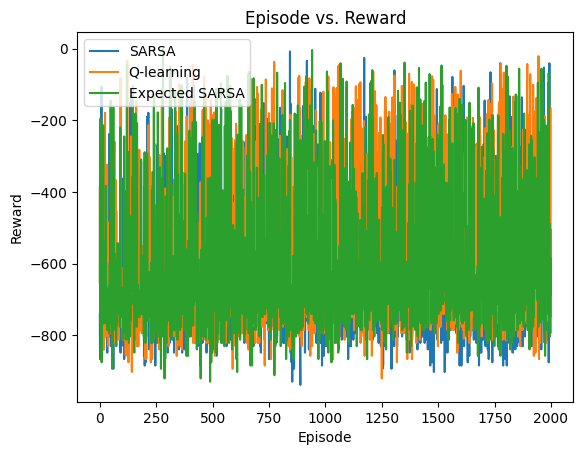

In [11]:
sarsa_rewards = sarsa_rewards[:n_episodes]
q_learning_rewards = q_learning_rewards[:n_episodes]
expected_sarsa_rewards = expected_sarsa_rewards[:n_episodes]

plt.plot(range(n_episodes), sarsa_rewards, label='SARSA')
plt.plot(range(n_episodes), q_learning_rewards, label='Q-learning')
plt.plot(range(n_episodes), expected_sarsa_rewards, label='Expected SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Episodes vs. Rewards')
plt.legend()
plt.show()

#### Compare and Comment on the performance of all three algorithms for 2000 episodes

In terms of average reward over 2000 episodes, Q-learning exceeds both SARSA and Expected SARSA. Although SARSA and Expected SARSA have greater payouts in the early episodes, Q-learning quickly outperforms both and obtains a considerably higher average return. 

Expected SARSA outperforms SARSA in general, but Q-learning outperforms both. This is due to the fact that Q-learning learns the optimal action-value function by always selecting the action that maximises the action-value function, resulting in faster convergence and superior performance versus SARSA and Expected SARSA. 

Overall, Q-learning outperforms SARSA and Expected SARSA in the Taxi-v2 environment, achieving better rewards in fewer episodes.